In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Final (1) (1).csv')

In [ ]:
df.head(10)

,Date,Month,Weather,Season,Week day,No. of trucks,Route,Loader,Hauled ore
0,96.03.01,3.0,Sunny,Spring,Monday,29.0,M4 to Factory,Hyundai 320,5892.51
1,96.03.02,3.0,Sunny,Spring,Tuesday,27.0,M4 to Factory,Hyundai 320,5895.40
2,96.03.03,3.0,Sunny,Spring,Wednesday,13.0,M4 to Factory,Hyundai 320,1924.89
3,96.03.04,3.0,Sunny,Spring,Thursday,21.0,M4 to Factory,Hyundai 320,3764.25
4,96.03.06,3.0,Sunny,Spring,Saturday,15.0,M4 to Factory,Hyundai 320,2143.39
5,96.03.07,3.0,Sunny,Spring,Sunday,17.0,M4 to Factory,Hyundai 320,2653.71
6,96.03.08,3.0,Sunny,Spring,Monday,15.0,M4 to Factory,Hyundai 320,2256.95
7,96.03.09,3.0,Sunny,Spring,Tuesday,16.0,M4 to Factory,Hyundai 320,2727.16
8,96.03.10,3.0,Sunny,Spring,Wednesday,19.0,M4 to Factory,Hyundai 320,3747.37
9,96.03.11,3.0,Sunny,Spring,Thursday,17.0,M4 to Factory,Hyundai 320,3169.47


In [ ]:
df.dropna()

,Date,Month,Weather,Season,Week day,No. of trucks,Route,Loader,Hauled ore
0,96.03.01,3.0,Sunny,Spring,Monday,29.0,M4 to Factory,Hyundai 320,5892.51
1,96.03.02,3.0,Sunny,Spring,Tuesday,27.0,M4 to Factory,Hyundai 320,5895.40
2,96.03.03,3.0,Sunny,Spring,Wednesday,13.0,M4 to Factory,Hyundai 320,1924.89
3,96.03.04,3.0,Sunny,Spring,Thursday,21.0,M4 to Factory,Hyundai 320,3764.25
4,96.03.06,3.0,Sunny,Spring,Saturday,15.0,M4 to Factory,Hyundai 320,2143.39
...,...,...,...,...,...,...,...,...,...
1971,00.03.24,3.0,Sunny,Spring,Monday,5.0,M3 to Factory,Hyundai 250,478.75
1972,00.03.25,3.0,Rainy,Spring,Tuesday,3.0,M3 to Factory,Hyundai 250,83.72
1973,00.03.26,3.0,Sunny,Spring,Wednesday,8.0,M3 to Factory,Hyundai 250,698.09
1974,00.03.27,3.0,Sunny,Spring,Thursday,8.0,M3 to Factory,Hyundai 250,597.14


In [ ]:
df['No. of trucks'].dropna()

0       29.0
1       27.0
2       13.0
3       21.0
4       15.0
        ... 
1971     5.0
1972     3.0
1973     8.0
1974     8.0
1975     8.0
Name: No. of trucks, Length: 1971, dtype: float64

In [ ]:
df['No. of trucks'].isnull().sum()

5

In [ ]:
df = df.dropna(subset=['No. of trucks'])

In [ ]:
df["No. of trucks"]=df["No. of trucks"].astype(int)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('Final (1) (1).csv')  # Update with your file path

# Keep only the relevant columns
df_relevant = df[['Month', 'No. of trucks', 'Route', 'Loader', 'Hauled ore']]

# Drop any rows with missing values (if any)
df_relevant = df_relevant.dropna()

# 1. Label Encoding for 'Route' and 'Loader'
label_encoder_routes = LabelEncoder()
label_encoder_loader = LabelEncoder()

df_relevant['Route'] = label_encoder_routes.fit_transform(df_relevant['Route'])
df_relevant['Loader'] = label_encoder_loader.fit_transform(df_relevant['Loader'])

# 2. Min-Max Scaling for numerical features
scaler = MinMaxScaler()

# Numerical features to scale
#numerical_features = ['Month', 'No. of trucks']
#df_relevant[numerical_features] = scaler.fit_transform(df_relevant[numerical_features])

# Separate features and target
X = df_relevant.drop(columns=['Hauled ore'])
y = df_relevant['Hauled ore']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and train the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = gbr_model.predict(X_test)

# 5. Evaluate the model performance using R² score
gbr_r2 = r2_score(y_test, y_pred)
print(f'R² score: {gbr_r2}')


R² score: 0.6803869810319995


In [ ]:
unique_loaders = df_relevant['Loader'].unique()
unique_trucks = df_relevant['No. of trucks'].unique()


print(unique_loaders)
print(unique_trucks)

[1 0 3 2]
[0.80555556 0.75       0.36111111 0.58333333 0.41666667 0.47222222
 0.44444444 0.52777778 0.61111111 0.55555556 0.63888889 0.11111111
 0.27777778 0.5        0.02777778 0.16666667 0.33333333 0.38888889
 0.30555556 0.66666667 0.22222222 0.77777778 0.86111111 0.88888889
 0.91666667 0.83333333 0.05555556 0.13888889 0.19444444 0.25
 0.08333333 0.         0.72222222 0.97222222 0.69444444 1.
 0.94444444]


In [ ]:
import pandas as pd
from itertools import product

# Define the specific values for Month and Route
specific_month = 4
specific_route = "M1 to LG-stockpile"

# Get the unique values of 'Loader' and 'No. of trucks' from the original dataset
unique_loaders = df_relevant['Loader'].unique()
unique_trucks = df_relevant['No. of trucks'].unique()

# Generate all possible unique combinations of Loader and No. of trucks
combinations = list(product(unique_loaders, unique_trucks))

# Create a DataFrame from these combinations
predict_df = pd.DataFrame(combinations, columns=['Loader', 'No. of trucks'])

# Add the fixed values for Month and Route to the DataFrame
predict_df['Month'] = specific_month
predict_df['Route'] = specific_route

# Label Encode 'Route' using the same encoder used in training
predict_df['Route'] = label_encoder_routes.transform(predict_df['Route'])

# Scale the 'Month' and 'No. of trucks' using the same scaler used in training
#predict_df[['Month', 'No. of trucks']] = scaler.transform(predict_df[['Month', 'No. of trucks']])

# Rearrange columns to match the training feature order
predict_df = predict_df[['Month', 'No. of trucks', 'Route', 'Loader']]

# Predict the Hauled ore using the trained Gradient Boosting Regressor model
predict_df['Predicted Hauled ore'] = gbr_model.predict(predict_df)

# Convert 'Loader' back to original labels if needed (reverse encoding)
predict_df['Loader'] = label_encoder_loader.inverse_transform(predict_df['Loader'])

# Display the resulting DataFrame with predictions
print(predict_df[['Loader', 'No. of trucks', 'Predicted Hauled ore']])


          Loader  No. of trucks  Predicted Hauled ore
0    Hyundai 320           29.0           4404.061118
1    Hyundai 320           27.0           4432.542532
2    Hyundai 320           13.0           2729.283502
3    Hyundai 320           21.0           3983.483782
4    Hyundai 320           15.0           2864.475040
..           ...            ...                   ...
143  Komatsu 200           26.0           4253.721980
144  Komatsu 200           35.0           4957.876574
145  Komatsu 200           25.0           4000.933747
146  Komatsu 200           36.0           4725.307349
147  Komatsu 200           34.0           4361.448393

[148 rows x 3 columns]


In [ ]:
predict_df["No. of trucks"]=predict_df["No. of trucks"].astype(int)

In [ ]:
filtered_df = predict_df[(predict_df['Loader'] == "Hyundai 320") & (predict_df['No. of trucks'] == 19)]

if len(filtered_df) > 0:
    predicted_hauled_ore = filtered_df['Predicted Hauled ore'].values[0]
    print(f"Predicted Hauled Ore for Hyundai 320 with 19 trucks: {predicted_hauled_ore}")
else:
    print("No matching record found in the DataFrame.")

Predicted Hauled Ore for Hyundai 320 with 19 trucks: 3690.7560383012315


Linear Regression with Label Encoder

Linear Regression

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

# Assuming df is your DataFrame containing the dataset
# Columns: "Season", "Month", "Number of Trucks", "Route", "Loader", "Hauled Ore"

# Extract features and target variable
X = df[["Season", "Month", "No. of trucks", "Route", "Loader"]]
y = df["Hauled ore"]

# Separate numeric and non-numeric columns
numeric_cols = X.select_dtypes(include='number').columns
non_numeric_cols = X.select_dtypes(exclude='number').columns

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

non_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('non_num', non_numeric_transformer, non_numeric_cols)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Create a pipeline with preprocessing and Linear Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None))
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculate R^2 score for testing set
test_r2_score_LR = r2_score(y_test, y_test_pred)

print(f"Test R^2 Score: {test_r2_score_LR:.4f}")


Test R^2 Score: 0.7236


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Create a pipeline with preprocessor and Decision Tree Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', DecisionTreeRegressor(random_state=42))])

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculate R^2 score for testing set
test_r2_score_DT = r2_score(y_test, y_test_pred)

print(f"Test R^2 Score: {test_r2_score_DT:.4f}")


Test R^2 Score: 0.7111


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Create a pipeline with preprocessor and KNN Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', KNeighborsRegressor(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30))])

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculate R^2 score for testing set
test_r2_score_KNN = r2_score(y_test, y_test_pred)

print(f"Test R^2 Score: {test_r2_score_KNN:.4f}")

Test R^2 Score: 0.7184


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create a pipeline with preprocessor and Random Forest Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculate R^2 score for testing set
test_r2_score_RF = r2_score(y_test, y_test_pred)

print(f"Test R^2 Score: {test_r2_score_RF:.4f}")

Test R^2 Score: 0.7573


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a pipeline with preprocessor and Gradient Boosting Decision Tree Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor(random_state=42))])

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculate R^2 score for testing set
test_r2_score_GB = r2_score(y_test, y_test_pred)

print(f"Test R^2 Score: {test_r2_score_GB:.4f}")

Test R^2 Score: 0.7713


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the categorical variable
# For example, let's say you have a DataFrame df with a column "Category"

# Calculate percentage of each category
#counts = [test_r2_score_LR*100,test_r2_score_DT*100,test_r2_score_KNN*100,test_r2_score_RF*100,test_r2_score_GB*100]

import matplotlib.pyplot as plt

# Assuming you have labels and their corresponding percentages
labels = ["Linear Regression", "Decision Tree", "K Nearest Neighbour", "Random Forest","Gradient Boosting"]  # Example labels
percentages = [test_r2_score_LR*100,test_r2_score_DT*100,test_r2_score_KNN*100,test_r2_score_RF*100,test_r2_score_GB*100]  # Example percentages

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, percentages, color='skyblue')
plt.title('R2 Score accuracy of models')
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy%')
plt.ylim(60, 90)  # Set y-axis limit to 0-100
plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


NameError: name 'test_r2_score_KNN' is not defined

In [ ]:
import numpy as np

# Prepare input data for prediction
# Assuming you have the loader type and number of trucks for prediction
loader = "Komatsu 200"  # Example loader type
num_trucks = 16  # Example number of trucks
month = 4  # Fixed month

# Create a DataFrame with the input data
input_data = pd.DataFrame({"Season": ['Spring'],  # Assuming season is fixed to "Spring"
                           "Month": [month],  # Fixed month
                           "No. of trucks": [num_trucks],
                           "Route": ['M4 to Factory'],  # Assuming route is fixed to "Route A"
                           "Loader": [loader]})

# Use the trained model to make predictions
predicted_ore = model.predict(input_data)

print(f"Predicted Hauled Ore for {loader} with {num_trucks} trucks in month {month}: {predicted_ore[0]:.2f} tonnes")


Predicted Hauled Ore for Komatsu 200 with 16 trucks in month 4: 2383.86 tonnes


["Season", "Month", "No. of trucks", "Route", "Loader"]

In [ ]:
print(df['Month'].unique())
print(df['No. of trucks'].unique())
print(df['Route'].unique())
print(df['Loader'].unique())
print(df['Season'].unique())

[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.  1.  2. nan]
[29. 27. 13. 21. 15. 17. 16. 19. 22. 20. 23.  4. 10. 18.  1.  6. 12. 14.
 11. 24.  8. 28. 31. 32. 33. 30.  2.  5.  7.  9.  3.  0. 26. 35. 25. 36.
 34. nan]
['M4 to Factory' 'Sup to Factory' 'M1 to Factory' 'M1 to LG-stockpile'
 'M4 to LG-stockpile' 'LG-stockpile to Factory' 'M2 to Factory'
 'M2 to LG-stockpile' 'M3 to Factory']
['Hyundai 320' 'Hyundai 250' 'Komatsu 220' 'Komatsu 200']
['Spring' 'Summer' 'Fall' 'Winter']


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

# Assuming df is your DataFrame containing the dataset
# Columns: "Season", "Month", "Number of Trucks", "Route", "Loader", "Hauled Ore"

# Extract features and target variable
X = df[["Month", "No. of trucks", "Loader"]]
y = df["Hauled ore"]

# Separate numeric and non-numeric columns
numeric_cols = X.select_dtypes(include='number').columns
non_numeric_cols = X.select_dtypes(exclude='number').columns

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

non_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('non_num', non_numeric_transformer, non_numeric_cols)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
# Create a pipeline with preprocessor and Gradient Boosting Decision Tree Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor(random_state=42))])

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculate R^2 score for testing set
test_r2_score_GB = r2_score(y_test, y_test_pred)

print(f"Test R^2 Score: {test_r2_score_GB:.4f}")

Test R^2 Score: 0.6577


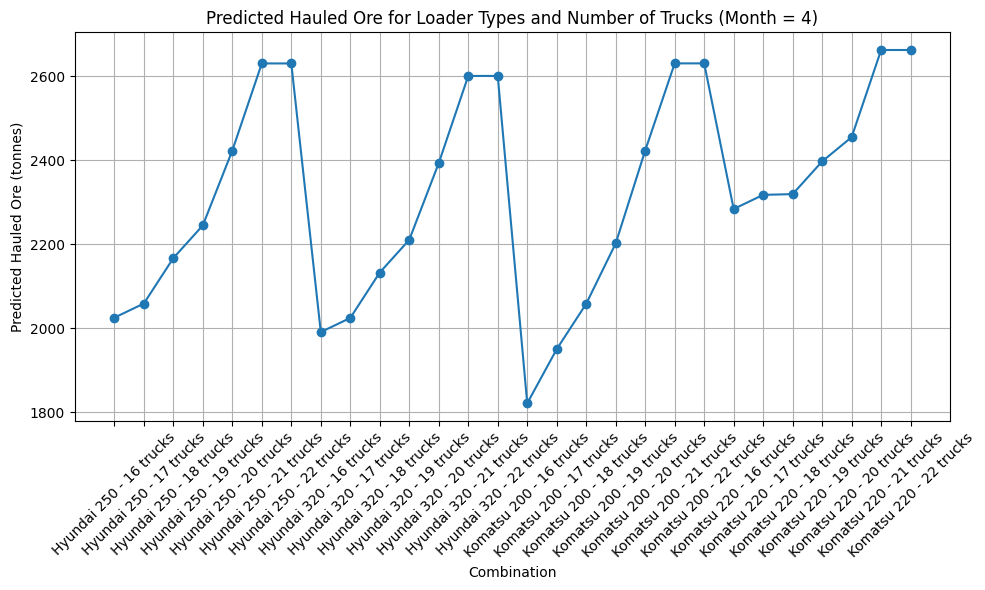

In [ ]:
import itertools
import matplotlib.pyplot as plt

# Create combinations of loader type and number of trucks
loader_types = ["Hyundai 250", "Hyundai 320", "Komatsu 200", "Komatsu 220"]
num_trucks = [16, 17, 18, 19, 20, 21, 22]

# Create all combinations of loader type and number of trucks
combinations = list(itertools.product(loader_types, num_trucks))

# Prepare input data for all combinations
input_data = pd.DataFrame(combinations, columns=["Loader", "No. of trucks"])

# Set month to 4 for all combinations
input_data["Month"] = 4

# Predict hauled ore for each combination
predicted_ore = model.predict(input_data)

# Plot the predicted hauled ore values
plt.figure(figsize=(10, 6))
plt.plot(predicted_ore, marker='o', linestyle='-')
plt.title('Predicted Hauled Ore for Loader Types and Number of Trucks (Month = 4)')
plt.xlabel('Combination')
plt.ylabel('Predicted Hauled Ore (tonnes)')
plt.xticks(ticks=range(len(input_data)), labels=[f'{loader} - {num_truck} trucks' for loader, num_truck in zip(input_data['Loader'], input_data['No. of trucks'])], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
